In [7]:
import meep as mp
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Simulation cell size
cell_size = mp.Vector3(16, 16, 0)

# PEC properties
pec_conductivity = 1e7  
pec = mp.Medium(epsilon=1, D_conductivity=pec_conductivity)  

# PEC square
square = mp.Block(mp.Vector3(8, 8, mp.inf), center=mp.Vector3(), material=pec)

# Source
frequency = 2.4e9  
src = [mp.Source(mp.ContinuousSource(frequency=frequency),
                 component=mp.Ex,
                 center=mp.Vector3(0, 0, 0))]

# Simulation
sim = mp.Simulation(cell_size=cell_size,
                    geometry=[square],
                    sources=src,
                    resolution=16)  # Lowering the resolution to keep computation reasonable

# Run simulation for a time to reach steady state
sim.run(until=200) 

# Calculate E-field and dielectric (for structure)
E_field = sim.get_array(center=mp.Vector3(), size=cell_size, component=mp.Ex)
eps_data = sim.get_array(center=mp.Vector3(), size=cell_size, component=mp.Dielectric)

# Prepare for 3D visualization
X = np.linspace(-8, 8, E_field.shape[0])
Y = np.linspace(-8, 8, E_field.shape[1])
X, Y = np.meshgrid(X, Y)

-----------
Initializing structure...
time for choose_chunkdivision = 2.00272e-05 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 16
     block, center = (0,0,0)
          size (8,8,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.123689 s
time for set_conductivity = 0.00250101 s
time for set_conductivity = 0.00248885 s
time for set_conductivity = 0.00728202 s
-----------
run 0 finished at t = 200.0 (6400 timesteps)


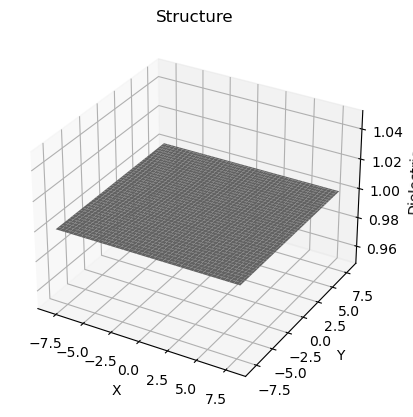

In [8]:
# Visualize the structure in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, eps_data, color='gray')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Dielectric')
plt.title('Structure')
plt.show()

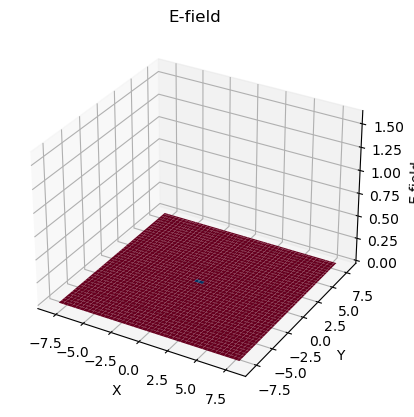

In [9]:
# Visualize the E-field in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, E_field, cmap='RdBu')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('E-field')
plt.title('E-field')
plt.show()